# Linear Regression


# Simple Linear Regression

Here we will try to see that if we can make a regression model to predict one column of a dataset by the use of other columns.

## Dataset

Population of U.S. Cities

### Description
The bigcity data frame has 49 rows and 2 columns.

The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken from the 196 largest cities in 1920.

### Format
This data frame contains the following columns:

`u`
The 1920 population.

`x`
The 1930 population.

There is one unnamed column also in this dataset. Please remove and ignore that coloumn.

Source

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press.

# Question 1 
Read the dataset given in file named 'bigcity.csv'.

In [31]:
#Upload the csv file to colab, incase you're working on jupyter
# directly read the csv using pandas.read_csv()
import pandas as pd
import numpy as np

cityData = pd.read_csv("bigcity.csv")
cityData.drop('Unnamed: 0', axis=1, inplace=True)

In [15]:
# Read the file and see a few rows
cityData.head()

,u,x
0,138,143
1,93,104
2,61,69
3,179,260
4,48,75


# Question 2 - Transform the dataset 
Find the number of rows in given dataset and separate the input(u column)  and target variables(x column) into X and Y.

Remove the unnamed coloumn.

Hint: You can use shape function to get the size of the dataframe


In [16]:
# get the shape

#Reshaping to make it compatible with linear regression model

X = cityData[["u"]]
Y = cityData[["x"]]
print(X.shape, Y.shape)

(49, 1) (49, 1)


# Question 3 - Check the dataset for any missing values and also print out the correlation matrix 

You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [18]:
cityData.isna().sum()

u    0
x    0
dtype: int64

In [19]:
cityData.corr()

,u,x
u,1.000000,0.981742
x,0.981742,1.000000


### The high correlation between u and x indicates that the variable u can be a good predictor of variable x

# Question 4 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.*

Check: train_test_split function

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(39, 1) (39, 1)
(10, 1) (10, 1)


# Question 5 - Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.

Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [36]:
#Reference link - http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)
print(regression_model.coef_,regression_model.intercept_)

[[1.15945123]] [9.71845532]


Fit the linear regression model

In [47]:
#Apply lr model 

#invoke the LinearRegression function 

c = regression_model.intercept_
m = regression_model.coef_
Y_pred = m * X_test + c
print(Y_pred)

             u
27  167.403823
34  148.852603
39   60.734310
48   51.458700
2    80.444981
3   217.260226
42   56.096505
29  306.537971
45   59.574858
30  118.706871


In [ ]:
# Let us explore the coefficients for each of the independent attributes


# Question 6 - Linear Relationship between feature and target 
Plot the line with b1 and b0 as slope and y-intercept.

Hint - y = mx + c, plot y

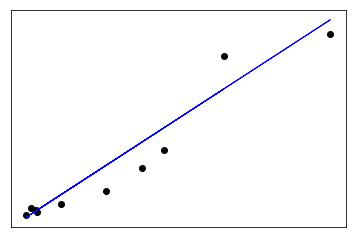

In [48]:
import matplotlib.pyplot as plt   

plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=1)

plt.xticks(())
plt.yticks(())
plt.show()

# Question 7 - Evaluation of model with scikit-learn 
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean square error over mean square error gives you root mean square error

In [57]:
from sklearn import metrics
mse = metrics.mean_squared_error(Y_test, Y_pred)
rms = np.sqrt(mse)
r2Score = metrics.r2_score(Y_test, Y_pred)
print("The Root Mean Sq Error is {} and R^2 score is {}".format(rms, r2Score))

The Root Mean Sq Error is 23.385235190249123 and R^2 score is 0.9181922560396981


## Question 8 - Calculate the accuracy of the model for both training and test data set 

### Hint: .score() function 

In [52]:
#Train accuracy
print(regression_model.score(X_train, Y_train))

0.9682175540860046


In [ ]:
#Test accuracy 

In [53]:
print(regression_model.score(X_test, Y_test))

0.9181922560396981
